### <font color='brown'>**Importation of Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### <font color='brown'>**Loading the Data set** 

In [3]:
df=pd.read_csv('C:\\Users\\ameer\\Downloads\\data_1.csv')

In [4]:
df                                     #read the data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


### <font color='brown'>**Data Description** 

In [5]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [6]:
df.shape

(2227, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [8]:
df.y.value_counts()

0    1242
1     985
Name: y, dtype: int64

In [9]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


### <font color='brown'>**Data Analysis** 

In [10]:
df.isnull().sum()   

x1    5
x2    3
y     0
dtype: int64

In [11]:
df = df.fillna(df.median())                          # Null Values Treatemen                       

Imputed Null values by Median.

In [12]:
df.isnull().sum()                

x1    0
x2    0
y     0
dtype: int64

In [13]:
df.corr()

,x1,x2,y
x1,1.000000,0.037285,-0.121200
x2,0.037285,1.000000,-0.026698
y,-0.121200,-0.026698,1.000000


There is no strong relation between features

### <font color='brown'>**Data vizualization** 

<AxesSubplot:>

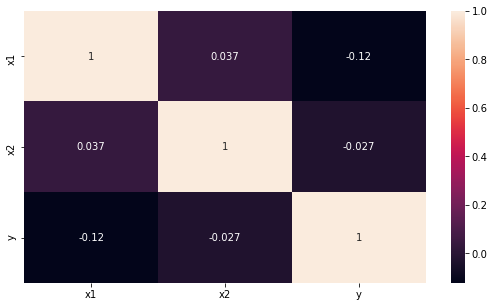

In [14]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot = True)

From the above figure we can say there is no either positive or negative strong 
relationship between features.

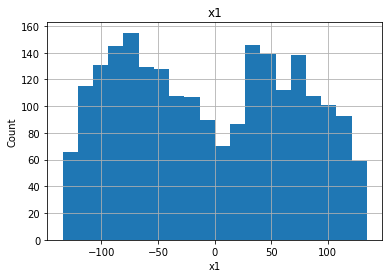

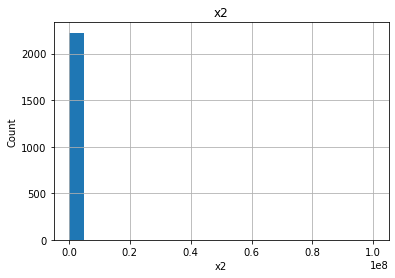

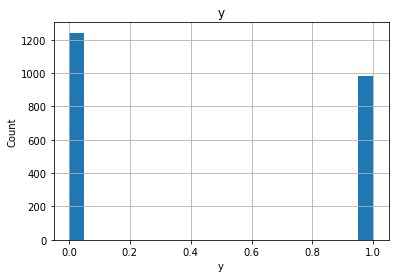

In [15]:
for i in df:
    df[i].hist (bins=20)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

sns.pairplot(data = df,
            x_vars = ['x1','x2'],                                       #relationship None
            y_vars = 'y')

<AxesSubplot:xlabel='x1'>

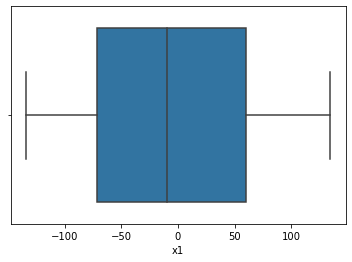

In [16]:
sns.boxplot(x = df.x1)                                           # No outliers detected

if we observe feature ***x1*** there is no Outliers 

<AxesSubplot:xlabel='x2'>

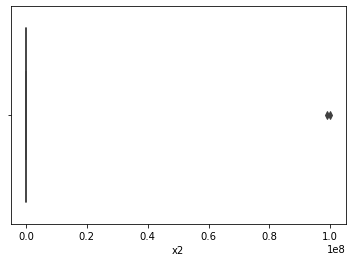

In [17]:
sns.boxplot(x = df.x2)                                   #  outliers detection

feature ***x2*** detecting lot of outliers, but from above diagram i didn't recognize where its appear from left or right side.

<AxesSubplot:xlabel='x2'>

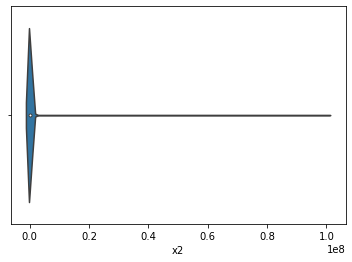

In [18]:
sns.violinplot(df["x2"])                   

considering feature ***x2*** and plotting violin plot, from this i can say right side there is detecting, so if we draw distribution plot then we can say where detecting large points(ie log normal or perito distribution).

In [19]:
Q1 = df["x2"].quantile(0.25)
Q3 = df["x2"].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

-79.976865695
63.749870955000006
143.72673665000002


intially i caliculate the quentiles devided whole data into five parts than finding Q1,Q3 from it found IQR(median[Q2]),so many less data points containig IQR region

In [20]:
min_point = Q1-1.5*IQR
max_point = Q3+1.5*IQR

So find out the Max, Min points which represents end points from this points above or away points considered as 
outliers.

In [21]:
print(min_point)
print(max_point)

-295.56697067000005
279.33997593000004


<AxesSubplot:xlabel='x2', ylabel='Density'>

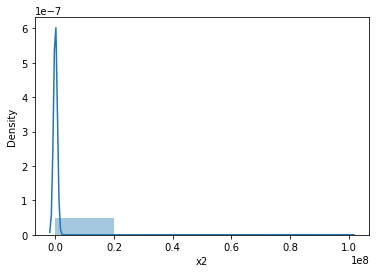

In [22]:
sns.distplot(df['x2'], bins=5)                          #lognormal Distribution

Here we draw the distribution plot checking the distribtion of ***x2*** features its appearing 
like Lognormal distribution ie lot of data points away from the mean if we obsereve most of points
appearing away from distribution. so we have to perform transformation of data. 

Lambda value used for Transformation: 0.2590680379388346


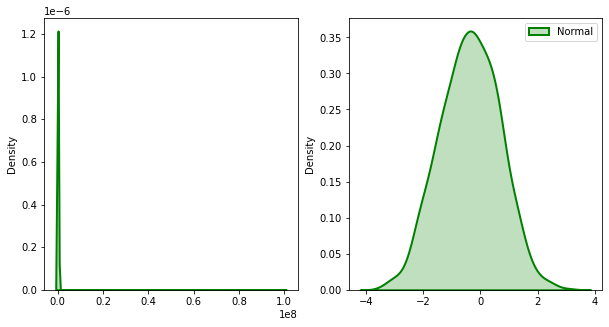

In [23]:
#  Box-cox Transformation
# of non-normal x2


from scipy import stats

# generate non-normal data 
original_data = np.random.exponential(size = 1000)

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(df, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},
label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},
label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")


In order to do transformation we have to use Box-Cox transformation, abve we are doing transformation
intially it is a lognormal distribution after applied transformation technique its convert most of data points into normal distributiontion. 

### <font color = 'brown'>**Data preparation**</font>

In [225]:
from sklearn.model_selection import train_test_split

trn_data, tst_data = train_test_split(df, train_size=0.8, \
                                                    random_state=0)

print(trn_data.shape)
print(tst_data.shape)

(1781, 3)
(446, 3)


In [226]:
y_trn = trn_data.pop('y')
X_trn = trn_data

In [227]:
print(X_trn.shape, y_trn.shape)

(1781, 2) (1781,)


In data preparation we are split the data into two parts as train and test(80-20)% respectively,
X_trn containg independent features and y_trn contain target or output feature of trained data points only.

In [228]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trn = sc.fit_transform(X_trn)
X_tst = sc.transform(X_tst)

### <font color = 'brown'>**Model_1 Making with Logistic Regression**</font>

In [229]:
from sklearn.linear_model import LogisticRegression     # Applying Logistic regression
model_1 = LogisticRegression()
model_1.fit(X_trn, y_trn)

LogisticRegression()

In [230]:
y_tst = tst_data.pop('y')
X_tst = tst_data

In [231]:
print(X_tst.shape, y_tst.shape)

(446, 2) (446,)


In [232]:
y_tst_pred = model_1.predict(X_tst)

In [266]:
acc = model_1.score(X_tst, y_tst)         # Caliculate the Accuracy
print( 'Accuracy of model_1', acc)

Accuracy of model_1 0.5807174887892377


### <font color = 'brown'>**Model_1 Hyperparameter Tuning**</font>

In [267]:
from sklearn.model_selection import GridSearchCV
penalty = ['l2']
gd = [500, 2000, 50000]
# define grid search
grid = dict(penalty=penalty,max_iter=gd)

grid_search = GridSearchCV(estimator=model_1, param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(X_tst, y_tst)
# summarize results
tuned_acc = 'Accuracy of tuned model_1',"Best: %f using %s" % (grid_result.best_score_, 
                                                                 grid_result.best_params_)


In [268]:
tuned_acc                                   # Caliculate the Accuracy after proper tuning

('Accuracy of tuned model_1',
 "Best: 0.746617 using {'max_iter': 500, 'penalty': 'l2'}")

### <font color = 'brown'>**Model_2 Making SVM with Linear Kernel**</font>

In [238]:
from sklearn.svm import SVC                   # "Support vector classifier"
model_2 = SVC(kernel='linear')
model_2.fit(X_trn, y_trn)

SVC(kernel='linear')

In [239]:
y_tst_pred = model_2.predict(X_tst)

In [270]:
acc = model_2.score(X_tst, y_tst)                  # Caliculate the Accuracy
print( 'Accuracy of model_2', acc)

Accuracy of model_2 0.5426008968609866


### <font color = 'brown'>**Model_2 Hyperparameter Tuning**</font>

In [271]:
c = [0.1, 1, 10, 100, 1000]
gama = [1, 0.1, 0.01, 0.001, 0.0001]
gd = [500, 2000, 50000]

# define grid search
grid = dict(C=c,gamma=gama,max_iter=gd)

grid_search = GridSearchCV(estimator=model_2, param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(X_tst, y_tst)
# summarize results
tuned_acc = 'Accuracy of tuned model_2',"Best: %f using %s" % (grid_result.best_score_, 
                                                                 grid_result.best_params_)

In [272]:
tuned_acc                          # Caliculate the Accuracy after proper tuning

('Accuracy of tuned model_2',
 "Best: 0.560624 using {'C': 0.1, 'gamma': 1, 'max_iter': 2000}")

### <font color = 'brown'>**Model_3 Making SVM with RBF Kernel**</font>

In [243]:
from sklearn.svm import SVC                       # "Support vector classifier"
model_3 = SVC(kernel='rbf', random_state = 0)
model_3.fit(X_trn, y_trn)

SVC(random_state=0)

In [244]:
y_tst_pred = model_3.predict(X_tst)

In [273]:
acc = model_3.score(X_tst, y_tst)                     # Caliculate the Accuracy
print( 'Accuracy of model_3', acc)

Accuracy of model_3 0.5426008968609866


### <font color = 'brown'>**Model_3 Hyperparameter Tuning**</font>

In [274]:
c = [0.1, 1, 10, 100, 1000]
gama = [1, 0.1, 0.01, 0.001, 0.0001]
gd = [500, 2000, 50000]

# define grid search
grid = dict(C=c,gamma=gama,max_iter=gd)

grid_search = GridSearchCV(estimator=model_3, param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(X_tst, y_tst)
# summarize results
tuned_acc = 'Accuracy of tuned model_3',"Best: %f using %s" % (grid_result.best_score_, 
                                                                 grid_result.best_params_)

In [275]:
tuned_acc                          # Caliculate the Accuracy after proper tuning

('Accuracy of tuned model_3',
 "Best: 0.959650 using {'C': 100, 'gamma': 0.0001, 'max_iter': 500}")

### <font color = 'brown'>**Model_4 Making Decision Tree**</font>

In [248]:
from sklearn import tree
model_4 = tree.DecisionTreeClassifier()
model_4.fit(X_trn, y_trn)

DecisionTreeClassifier()

In [249]:
y_tst_pred = model_4.predict(X_tst)              

In [278]:
acc = model_4.score(X_tst, y_tst)                # Caliculate the Accuracy
print( 'Accuracy of model_4', acc)                 # Best model 

Accuracy of model_4 0.9484304932735426


### <font color = 'brown'>**Model_4 Hyperparameter Tuning**</font>

In [279]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating RandomizedSearchCV object
rndm_search = RandomizedSearchCV(model_4, param_dist)
  
rndm_search.fit(X_tst, y_tst)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rndm_search.best_params_))
tuned_acc= "Best score is {}".format(rndm_search.best_score_)

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}


In [280]:
tuned_acc                                      # Caliculate the Accuracy after proper tuning

'Best score is 0.9282896379525593'

### <font color = 'brown'>**Model_5 Making K Nearest Neighbour**</font>

In [259]:
from sklearn.neighbors import KNeighborsClassifier
model_5 = KNeighborsClassifier(n_neighbors=13)
model_5.fit(X_trn, y_trn)

KNeighborsClassifier(n_neighbors=13)

In [260]:
y_tst_pred = model_5.predict(X_tst)

In [282]:
acc = model_5.score(X_tst, y_tst)                 # Caliculate the Accuracy
print( 'Accuracy of model_5', acc)

Accuracy of model_5 0.7017937219730942


### <font color = 'brown'>**Model_5 Hyperparameter Tuning**</font>

In [283]:
metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 16)

grid  = dict(metric=metrics, n_neighbors=neighbors)

grid_search = GridSearchCV(estimator=model_5, param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(X_tst, y_tst)
# summarize results
tuned_acc = 'Accuracy of tuned model_5',"Best: %f using %s" % (grid_result.best_score_, 
                                                                 grid_result.best_params_)

In [284]:
tuned_acc                                # Caliculate the Accuracy after proper tuning

('Accuracy of tuned model_5',
 "Best: 0.966342 using {'metric': 'euclidean', 'n_neighbors': 7}")

### <font color = 'brown'>**Comperision of all Models**</font>

In [303]:
values = {'Accuracy'       : [0.5807, 0.5426, 0.5426, 0.9484, 0.7017],
          'Tuned_accuracy' : [0.7466, 0.5606, 0.9596, 0.9282, 0.9663],
          'MODELS'         : ['LR','SVM-LK','SVM-RK','DT','KNN']}


In [304]:
cmpr_mdls = pd.DataFrame(values, columns = ['MODELS','Accuracy','Tuned_accuracy'])
cmpr_mdls

,MODELS,Accuracy,Tuned_accuracy
0,LR,0.5807,0.7466
1,SVM-LK,0.5426,0.5606
2,SVM-RK,0.5426,0.9596
3,DT,0.9484,0.9282
4,KNN,0.7017,0.9663


In [306]:
cmpr_mdls['Accuracy'].max()         # DT Model

0.9484

In [314]:
cmpr_mdls['Accuracy'].min()          # SVM Models

0.5426

In [315]:
cmpr_mdls['Tuned_accuracy'].max()     # KNN Model

0.9663

In [317]:
cmpr_mdls['Tuned_accuracy'].min()      # SVM Linear Kernel Model

0.5606

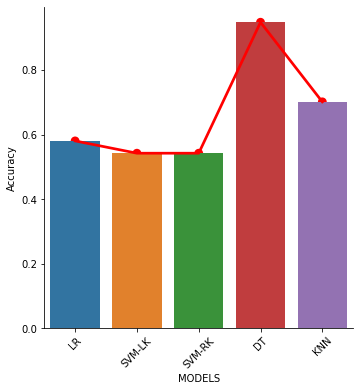

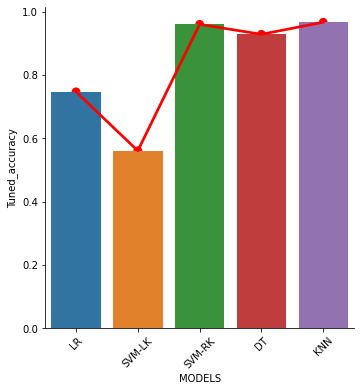

In [319]:
columns = ['Accuracy','Tuned_accuracy']

for i in columns:
  sns.catplot(x='MODELS', y=i, kind="point", color = 'red', data=cmpr_mdls)
  sns.barplot(x='MODELS', y=i, data=cmpr_mdls)
  plt.xticks(rotation=45)
  plt.show()

<font color='blue'> From the above we can say KNN Model is Best model as compare to all becouse KNN has best accuracy(best model) and tuned accuracy also high, its having consistancy in between accuracy and tuned accuracy.

if we lookingg DT accuracy, it is also best model but when tuned the model having Overfit issue.

SVM-LK is very bad model becouse its accuracy is very low i.e. high vareince while after tuning there is no improvement high varience(overfit issue).
    
SVM-RK is low accuracy intially when tuned its having good accuracy (best model) no any issues, but compare with different models its having no consistancy in between accuracy and tuned accuracy. 
    
LR is also tuned very well but as compared to all models its having high varience issues.
    
<font color='orange'>***CONCLUSION*** : <font color='green'>***Finally i can say KNN is Best Model***